# Project: Stock Market Analysis and Prediction

## Stock Market Data From Yahoo Finance

### Introduction

   The project focused on Stock Market Analysis and Prediction, incorporating techniques in technical analysis, data visualization, and prediction using data sourced from Yahoo Finance. The analysis primarily concentrated on **top 4** Indian Tech stocks. The project involved leveraging the Pandas library to retrieve and process stock information, enabling the visualization of various key indicators and trends.

Additionally, the study delved into assessing the **risk** associated with individual stocks by analyzing their historical performance. Various methodologies were applied to gauge risk, ultimately leading to the utilization of **Monte Carlo simulations** to forecast future stock prices.

### Questions

In this analysis, I would like to explore the following questions.

1. How did the stock price evolve over time?
2. What was the average daily return of the stock?
3. How did the moving average of different stocks fluctuate?
4. Is there a correlation between the closing prices of different stocks?
5. Is there a correlation between the daily returns of different stocks?
6. What is the level of risk associated with investing in a particular stock?
7. What methodologies can be employed to forecast future stock performance?

In [33]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [34]:
from datetime import datetime
import yfinance as yf

In [35]:
# List of Tech_stocks for analytics
tech_list = ['INFY.NS', 'TCS.NS', 'TECHM.NS', 'HCLTECH.NS']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year -1, end.month,end.day)

# For-loop for grabbing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock.replace('.', '_')] = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Let's go ahead and explore TCS_NS Stock DataFrame to get a feel for the data.

In [36]:
TCS_NS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,3107.800049,3171.949951,3098.050049,3164.800049,3063.151611,3402251
2022-07-21,3167.000000,3184.000000,3144.050049,3177.300049,3075.250000,2420640
2022-07-22,3185.000000,3197.000000,3143.500000,3171.000000,3069.152344,2075886
2022-07-25,3165.000000,3186.449951,3149.100098,3166.750000,3065.038818,1797504
2022-07-26,3164.699951,3168.899902,3096.500000,3115.899902,3015.822021,2639367


In [37]:
#summery for TCS_NS stock
TCS_NS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,3265.300199,3290.350394,3238.014929,3265.614715,3202.431053,1.904370e+06
std,121.251205,121.250588,121.829090,122.014808,135.025864,9.340155e+05
min,2959.850098,3019.699951,2926.100098,2982.050049,2886.271240,0.000000e+00
25%,3184.500000,3199.349915,3159.075073,3187.212463,3114.703491,1.359146e+06
50%,3263.724976,3289.574951,3232.250000,3259.799927,3207.383301,1.687341e+06
75%,3350.000000,3377.000000,3316.437500,3344.837463,3284.073242,2.197374e+06
max,3549.000000,3575.000000,3527.000000,3558.050049,3522.623535,6.739966e+06


In [38]:
TCS_NS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-07-20 to 2023-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


<AxesSubplot: xlabel='Date'>

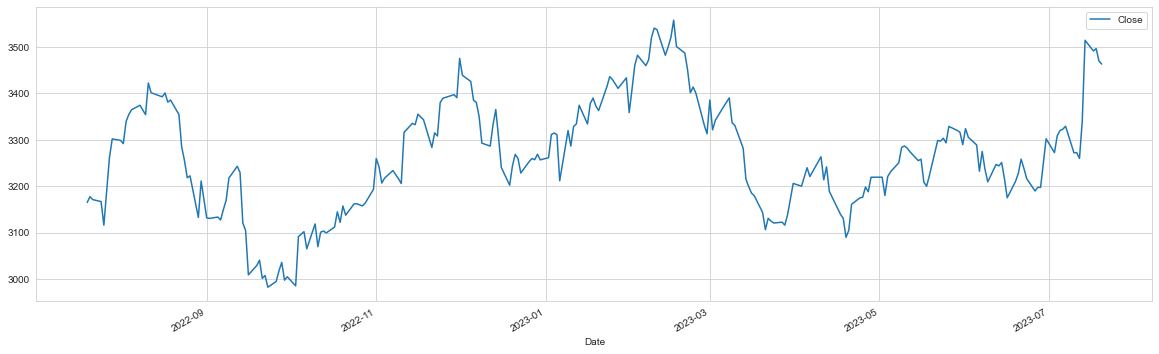

In [39]:
## Let's see a historical view of the closing price
TCS_NS['Close'].plot(legend = True,figsize = (20,6))

<AxesSubplot: xlabel='Date'>

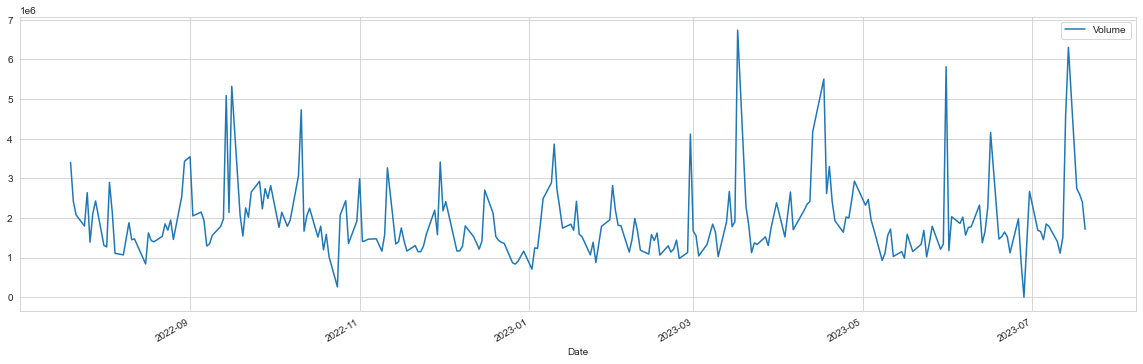

In [40]:
# Now let's plot the total volume of stock being traded each day over the past year
TCS_NS['Volume'].plot(legend = True,figsize = (20,6))

We can see that in MARCH'2023 higher volume of TCS_NS stock is being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for TCS_NS stock. Let's go ahead and calculate the moving average for TCS_NS stock.

In [41]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA = [10,20,50,100]

for ma in MA:
    column_name = "MA for %s days"%(str(ma))
    TCS_NS[column_name] =TCS_NS['Close'].rolling(window=ma).mean()

<AxesSubplot: xlabel='Date'>

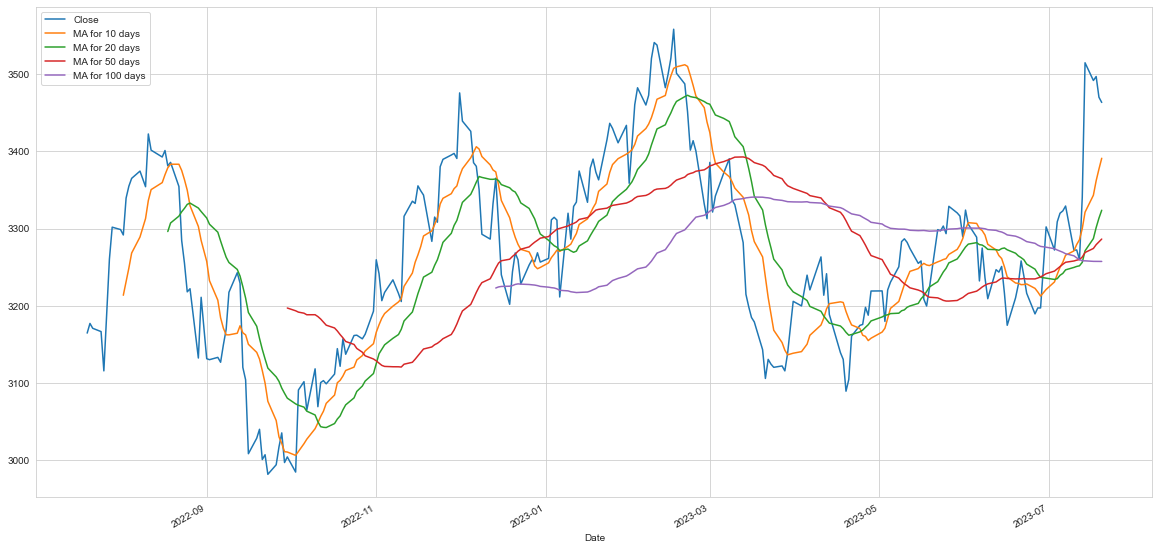

In [42]:
TCS_NS[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(20,10))

## Section B - Daily Return Analysis

Now we have done some baseline analysis. We are now going to analyze the **Risk of the stock.**

Thus we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the TCS_NS stock.

<AxesSubplot: xlabel='Date'>

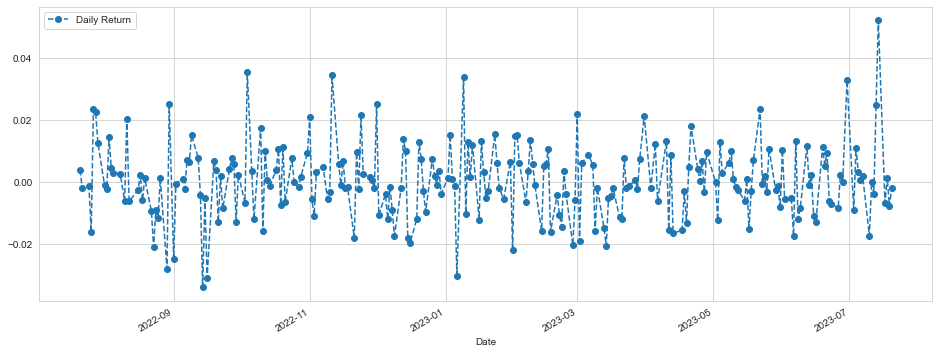

In [43]:
TCS_NS['Daily Return'] = TCS_NS['Close'].pct_change()

# Lets plot the daily return percentage
TCS_NS['Daily Return'].plot(figsize=(16,6), legend=True, linestyle='--', marker='o')

<AxesSubplot: xlabel='Daily Return', ylabel='Count'>

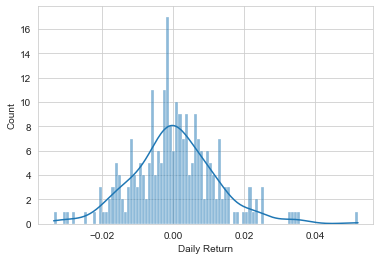

In [44]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(TCS_NS['Daily Return'].dropna(), bins=100,kde=True)

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [45]:
# Grab all the closing prices for the tech stock list into one DataFrame
closingprice_df = yf.download(tech_list, start=start, end=end)['Close']

[*********************100%***********************]  4 of 4 completed


In [46]:
closingprice_df.head()

,HCLTECH.NS,INFY.NS,TCS.NS,TECHM.NS
Date,,,,
2022-07-20,917.400024,1515.300049,3164.800049,1045.500000
2022-07-21,924.450012,1532.900024,3177.300049,1032.750000
2022-07-22,920.250000,1506.300049,3171.000000,1028.699951
2022-07-25,930.650024,1503.599976,3166.750000,1017.250000
2022-07-26,913.500000,1451.150024,3115.899902,999.349976


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the *RELIANCE_NS* stock.

In [47]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()
tech_returns.head()

,HCLTECH.NS,INFY.NS,TCS.NS,TECHM.NS
Date,,,,
2022-07-20,NaN,NaN,NaN,NaN
2022-07-21,0.007685,0.011615,0.003950,-0.012195
2022-07-22,-0.004543,-0.017353,-0.001983,-0.003922
2022-07-25,0.011301,-0.001793,-0.001340,-0.011131
2022-07-26,-0.018428,-0.034883,-0.016058,-0.017596


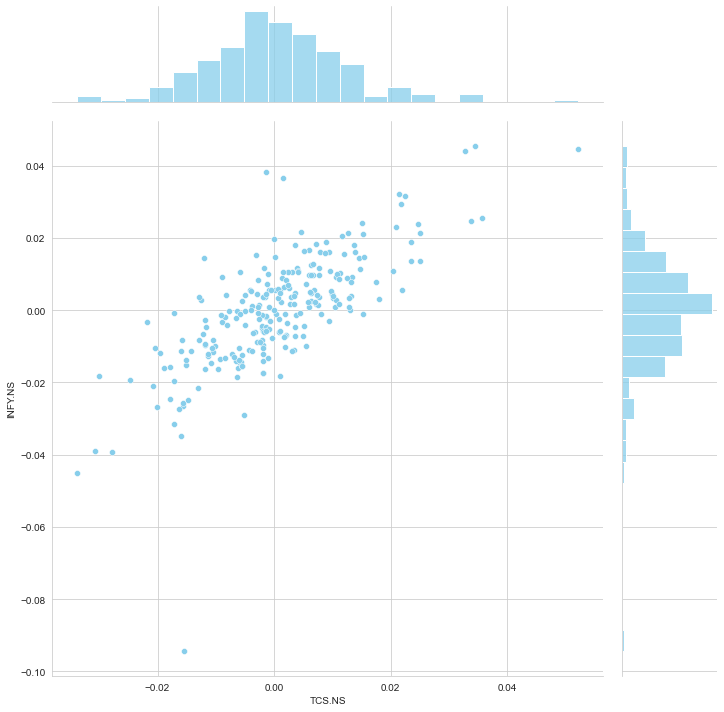

In [49]:
# We'll use scatter joinplot to compare the daily returns of INFY.NS and TCS.
sns.jointplot(x='TCS.NS',y='INFY.NS',data=tech_returns, kind='scatter', color='skyblue',height= 10)

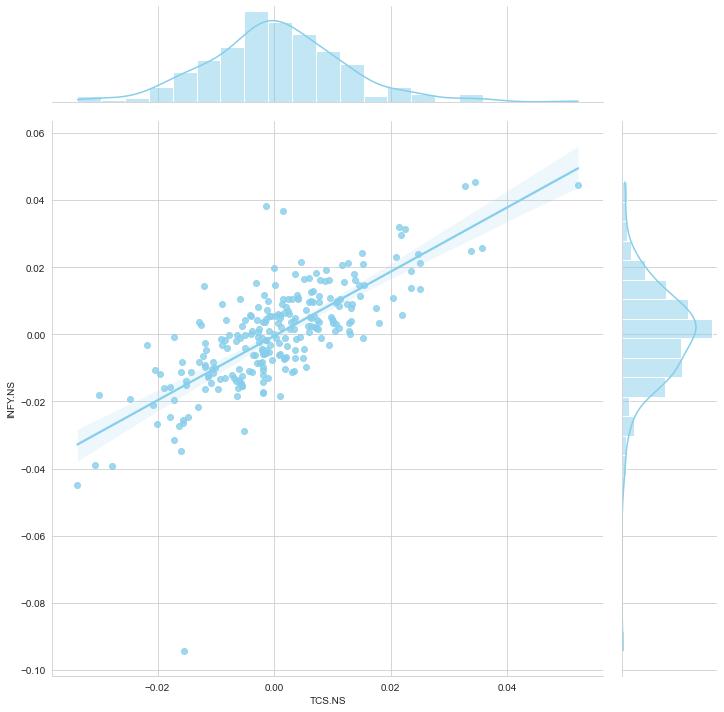

In [50]:
# We'll use reg joinplot to compare the daily returns of INFY.NS and TCS.
sns.jointplot(x='TCS.NS',y='INFY.NS',data=tech_returns, kind='reg', color='skyblue',height= 10)

Seaborn makes it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list by using **sns.pairplot()** 

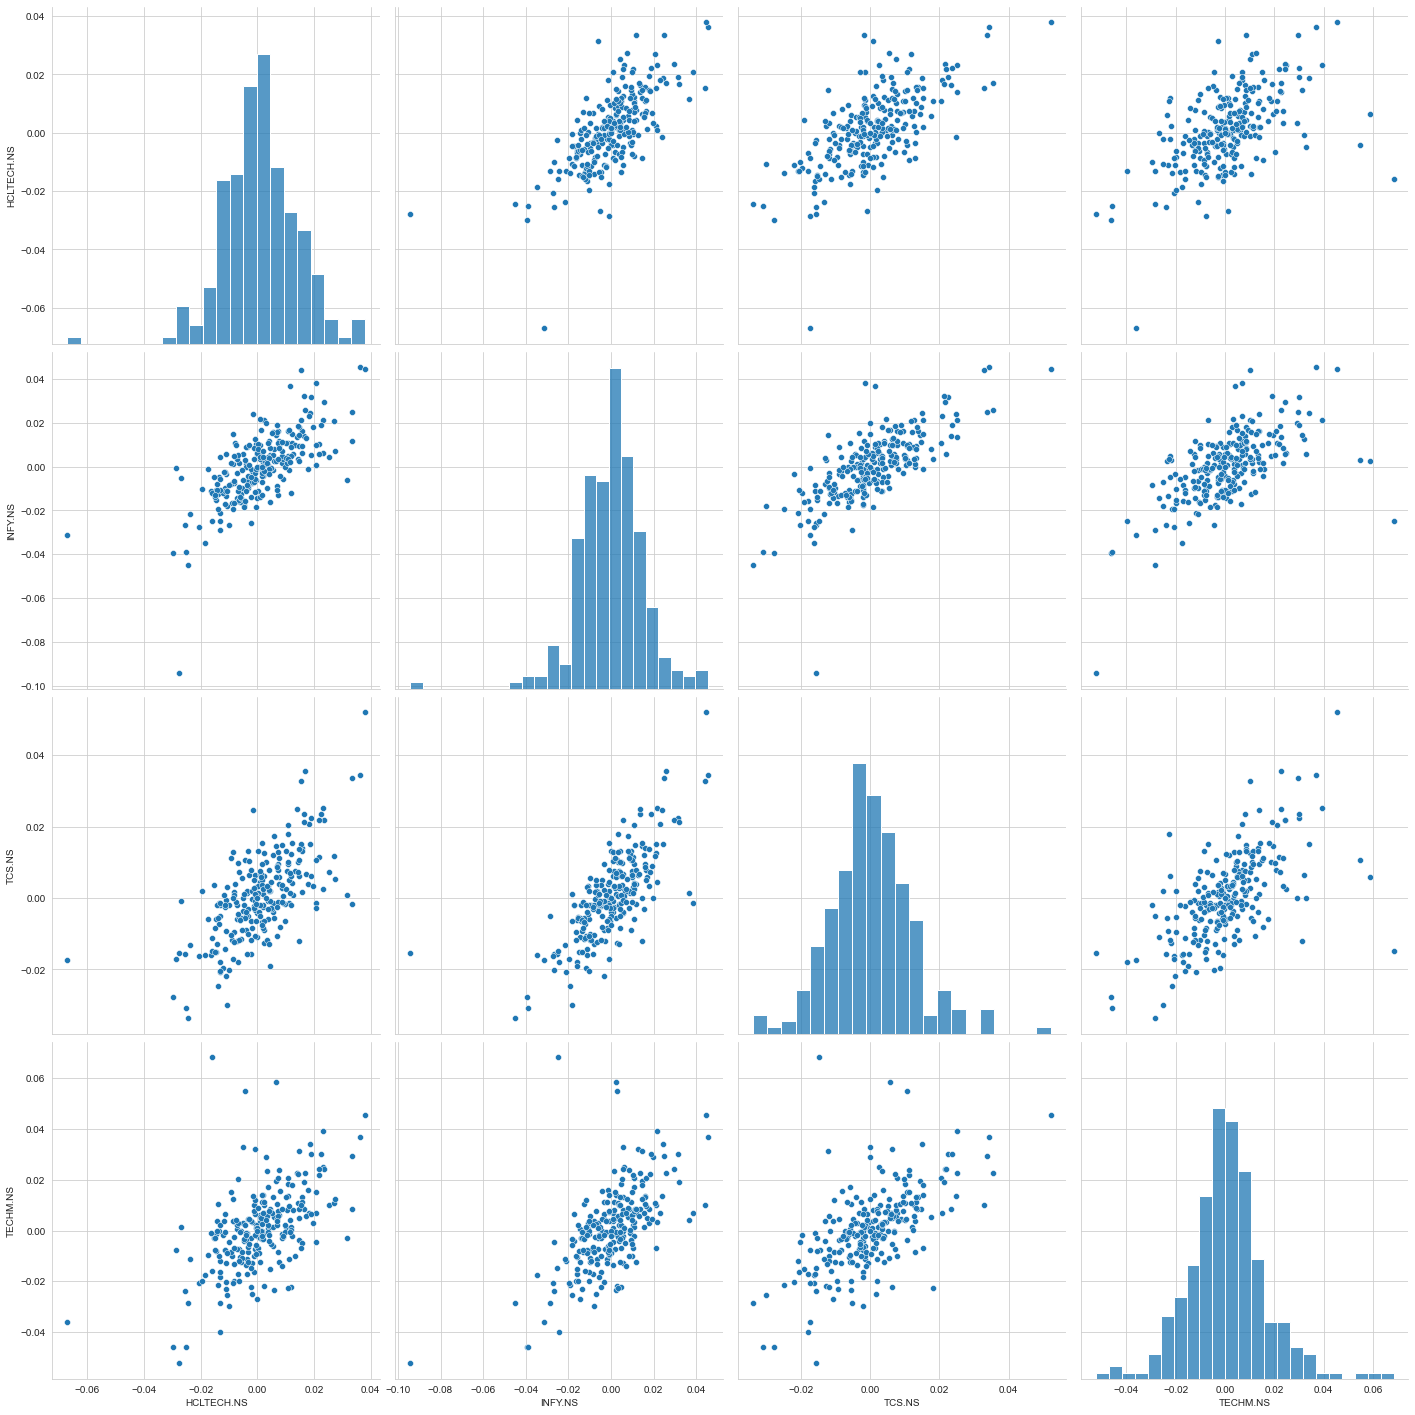

In [56]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),height=5)

We can do a correlation plot to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices. We see the interesting relationship between TCS and Infosys.

<AxesSubplot: >

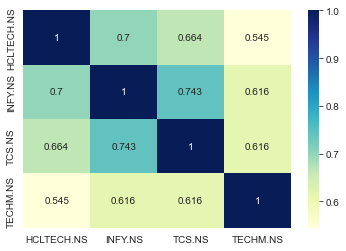

In [58]:
# Let's use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<AxesSubplot: >

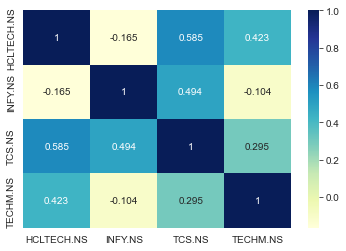

In [59]:
# Let's use seaborn for a quick heatmap to get correlation for the closing price of the stocks.
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

##### Here we see that among these 4 companies the closing price for TCS and INFY are highly correlated.

# RISK ANALYSIS
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk)

In [60]:
# defining a new DataFrame as clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()
rets.head()

,HCLTECH.NS,INFY.NS,TCS.NS,TECHM.NS
Date,,,,
2022-07-21,0.007685,0.011615,0.003950,-0.012195
2022-07-22,-0.004543,-0.017353,-0.001983,-0.003922
2022-07-25,0.011301,-0.001793,-0.001340,-0.011131
2022-07-26,-0.018428,-0.034883,-0.016058,-0.017596
2022-07-27,0.016366,0.013713,0.023412,0.008305


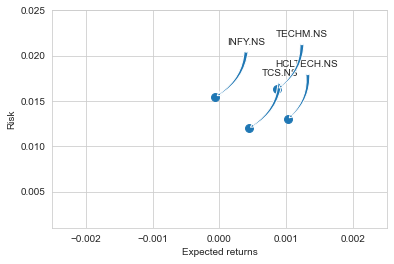

In [61]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say all these stocks except *INFY* have lower risk and positive expected returns.

# VALUE AT RISK:
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

## Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles

<AxesSubplot: xlabel='Daily Return', ylabel='Count'>

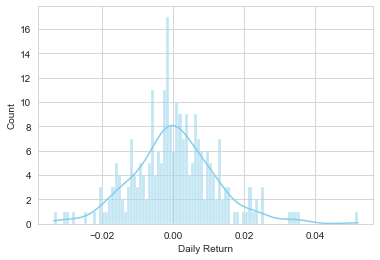

In [65]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(TCS_NS['Daily Return'].dropna(),bins=100,color='skyblue', kde=True)

In [66]:
# The 0.05 empirical quantile of daily returns

# For TCS stocks
rets["TCS.NS"].quantile(0.05)

-0.01770740256660309

The 0.05 empirical quantile of daily returns is at -0.0177. That means that with 95% confidence, our worst daily loss will not exceed 1.77%. If we have a 1 Lakh rupees investment, our one-day 5% VaR is 0.0177 * 100000 = ₹1,770

In [68]:
# For INFY stocks
rets["INFY.NS"].quantile(0.05)

-0.023708363006958808

In [69]:
# For TECHM stocks
rets["TECHM.NS"].quantile(0.05)

-0.023393278862514754

In [71]:
# For HCLTECH stocks
rets["HCLTECH.NS"].quantile(0.05)

-0.01713565417255809

## Value at Risk using the Monte Carlo method

We will employ the Monte Carlo simulation technique to conduct multiple trials with randomly generated market conditions. Each trial will calculate portfolio losses, enabling us to assess the stock's level of risk.

For this purpose, we will utilize the geometric Brownian motion (GBM), which is a type of Markov process. GBM models the stock price as a random walk and aligns with the weak form of the efficient market hypothesis (EMH). According to the EMH, past price information is already reflected in the stock's current price, and future price movements are conditionally independent of historical price movements.

In simpler terms, this implies that past stock price information does not dictate the exact future price, making it challenging to predict future stock behavior solely based on past price data. Through Monte Carlo simulations, we can gain valuable insights into the stock's risk profile and make more informed investment decisions.

Observing the stock price's evolution, we find that it can be expressed as the current stock price multiplied by two distinct factors. The first factor, termed **drift**, represents the average daily return multiplied by the time change. The second factor, termed **shock**, accounts for the stock's tendency to drift based on the average return and then encounter a random "shock" that unpredictably pushes the stock price upward or downward. 

By simulating numerous iterations of this process, incorporating both drift and shock, we can create a series of potential stock price paths. These simulations offer valuable insights into where the stock price might be expected to fall within the range of possibilities, aiding in risk assessment and informed decision-making for investment purposes.

In [73]:
rets.head()

,HCLTECH.NS,INFY.NS,TCS.NS,TECHM.NS
Date,,,,
2022-07-21,0.007685,0.011615,0.003950,-0.012195
2022-07-22,-0.004543,-0.017353,-0.001983,-0.003922
2022-07-25,0.011301,-0.001793,-0.001340,-0.011131
2022-07-26,-0.018428,-0.034883,-0.016058,-0.017596
2022-07-27,0.016366,0.013713,0.023412,0.008305


In [74]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['TCS.NS']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['TCS.NS']

In [75]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [76]:
TCS_NS.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2022-07-20,3107.800049,3171.949951,3098.050049,3164.800049,3063.151611,3402251,NaN,NaN,NaN,NaN,NaN
2022-07-21,3167.000000,3184.000000,3144.050049,3177.300049,3075.250000,2420640,NaN,NaN,NaN,NaN,0.003950
2022-07-22,3185.000000,3197.000000,3143.500000,3171.000000,3069.152344,2075886,NaN,NaN,NaN,NaN,-0.001983
2022-07-25,3165.000000,3186.449951,3149.100098,3166.750000,3065.038818,1797504,NaN,NaN,NaN,NaN,-0.001340
2022-07-26,3164.699951,3168.899902,3096.500000,3115.899902,3015.822021,2639367,NaN,NaN,NaN,NaN,-0.016058


<Figure size 1872x1152 with 0 Axes>

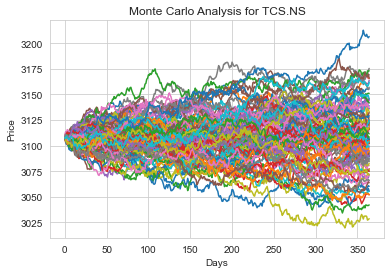

<Figure size 1872x1152 with 0 Axes>

In [84]:
start_price = 3107.800049

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for TCS.NS')
plt.figure(figsize=(26,16))

In [85]:
INFY_NS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,1501.250000,1525.800049,1500.000000,1515.300049,1459.405518,5079392
2022-07-21,1517.000000,1535.449951,1503.099976,1532.900024,1476.356323,5008061
2022-07-22,1534.000000,1540.000000,1492.150024,1506.300049,1450.737671,7020642
2022-07-25,1480.099976,1517.150024,1480.099976,1503.599976,1448.137207,7859626
2022-07-26,1496.650024,1496.650024,1445.000000,1451.150024,1397.621826,7268273


<Figure size 1872x1152 with 0 Axes>

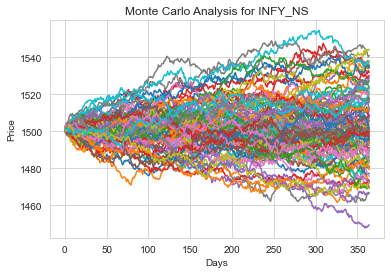

<Figure size 1872x1152 with 0 Axes>

In [88]:
start_price = 1501.250000
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for INFY_NS')
plt.figure(figsize=(26,16))

In [89]:
HCLTECH_NS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,904.599976,918.799988,895.099976,917.400024,877.468567,4827089
2022-07-21,921.000000,926.950012,913.549988,924.450012,884.211731,3498709
2022-07-22,929.400024,931.900024,909.000000,920.250000,880.194458,3514659
2022-07-25,920.250000,932.000000,914.000000,930.650024,890.141907,2120224
2022-07-26,928.500000,929.650024,911.099976,913.500000,873.738281,2780103


<Figure size 1872x1152 with 0 Axes>

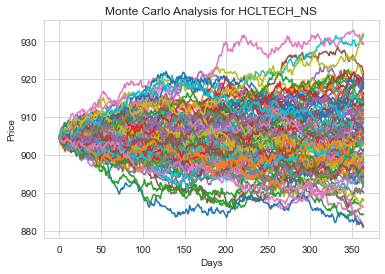

<Figure size 1872x1152 with 0 Axes>

In [90]:
start_price = 904.599976

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for HCLTECH_NS')
plt.figure(figsize=(26,16))

In [91]:
TECHM_NS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,1021.250000,1051.699951,1017.250000,1045.500000,986.852478,5574762
2022-07-21,1025.000000,1035.800049,1011.049988,1032.750000,989.007202,4935223
2022-07-22,1040.000000,1043.699951,1013.250000,1028.699951,985.128662,2985409
2022-07-25,1028.900024,1028.900024,1008.250000,1017.250000,974.163696,2888919
2022-07-26,1015.000000,1037.250000,994.150024,999.349976,957.021790,5939871


<Figure size 1872x1152 with 0 Axes>

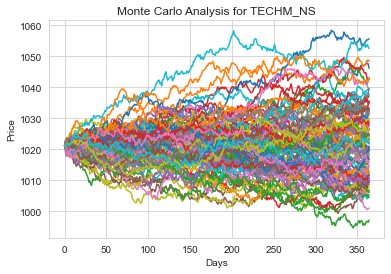

<Figure size 1872x1152 with 0 Axes>

In [92]:
start_price = 1021.250000

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for TECHM_NS')
plt.figure(figsize=(26,16))

In [93]:
# Lets start with TCS.NS stock price
start_price = 3107.800049

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

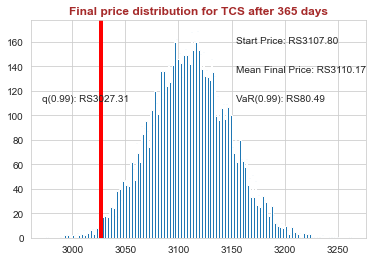

In [94]:

# Calculate the 1% quantile
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6, 0.8, 'Start Price: RS%.2f' % start_price)

# mean ending price
plt.figtext(0.6, 0.7, 'Mean Final Price: RS%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99): RS%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): RS%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for TCS after %s days" % days, weight='bold', color='Brown')

# Show the plot
plt.show()


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the TCS stock(TCS.NS), which looks to be ₹80.49 for every investment of 3107.80 (The price of one initial TCS.NS Stock).

This basically means for every initial RELIANCE.NS stock you purchase you're putting about ₹80.49 at risk 99% of the time from our Monte Carlo Simulation.

Let's do this for all remaining companies

In [95]:
# Lets start with INFY stock price
start_price = 1501.250000

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

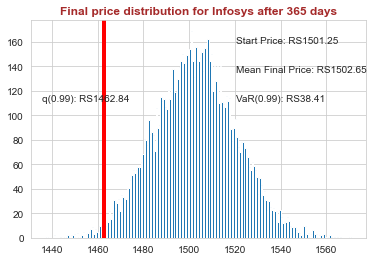

In [96]:
# Calculate the 1% quantile
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6, 0.8, 'Start Price: RS%.2f' % start_price)

# mean ending price
plt.figtext(0.6, 0.7, 'Mean Final Price: RS%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99): RS%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): RS%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Infosys after %s days" % days, weight='bold', color='Brown')

# Show the plot
plt.show()


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the INFY stock(INFY.NS), which looks to be ₹38.41 for every investment of 1501.25(The price of one initial INFY.NS Stock).

This basically means for every initial INFY.NS stock you purchase you're putting about ₹38.41 at risk 99% of the time from our Monte Carlo Simulation.

HCL TECH

In [97]:
# Lets start with HCL TECH stock price
start_price = 904.599976

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

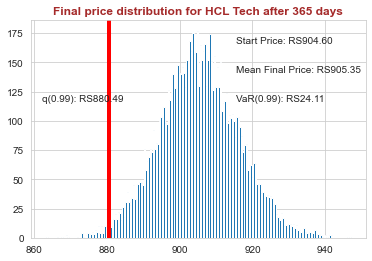

In [98]:
# Calculate the 1% quantile
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6, 0.8, 'Start Price: RS%.2f' % start_price)

# mean ending price
plt.figtext(0.6, 0.7, 'Mean Final Price: RS%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99): RS%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): RS%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for HCL Tech after %s days" % days, weight='bold', color='Brown')

# Show the plot
plt.show()


Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the HCL stock(HCLTECH.NS), which looks to be ₹24.11 for every investment of 904.60(The price of one initial Stock).

This basically means for every initial stock you purchase you're putting about ₹24.11 at risk 99% of the time from our Monte Carlo Simulation.

TECH MAHINDRA

In [99]:
# Lets start with Google stock price
start_price = 1021.250000

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

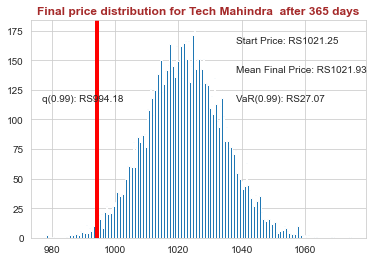

In [100]:
# Calculate the 1% quantile
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6, 0.8, 'Start Price: RS%.2f' % start_price)

# mean ending price
plt.figtext(0.6, 0.7, 'Mean Final Price: RS%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99): RS%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): RS%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Tech Mahindra  after %s days" % days, weight='bold', color='Brown')

# Show the plot
plt.show()


Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the TECH Mahindra stock(TECHM.NS), which looks to be ₹27.07 for every investment of 1021.25(The price of one initial Stock).

This basically means for every initial TECHM.NS stock you purchase you're putting about ₹27.07 at risk 99% of the time from our Monte Carlo Simulation.

## Conclusion:
In this analysis, we utilized the 1% empirical quantile of the final price distribution to estimate the Value at Risk (VaR) for the companies under consideration. The VaR serves as a measure of the potential financial loss one could face for a given level of confidence.

Based on our extensive Monte Carlo Simulation, we can confidently state that for every initial stock purchase, there is a high degree of certainty (99% confidence level) that the amount of money at risk is limited to a specific threshold. This valuable insight enables investors to assess and manage the potential risks associated with their investments, facilitating informed decision-making and risk management strategies.

| Stock | Value at Risk(₹)| Start Price(₹) |
| --- | --- | --- |
| 
| TCS | ₹80.49| 3107.80 |
| Infosys |₹38.41| 1501.25 |
| HCL TECH | ₹24.11 | 904.60 |
| TECH Mahindra | 68.80 |1021.25 |
| --- | --- | --- |